In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import h5py
def load_h5(h5_path):
    # load training data
    with h5py.File(h5_path, 'r') as hf:
        print('List of arrays in input file:', list(hf.keys()))
        audio_name = np.array(hf.get('audio_name'))
        fold = np.array(hf.get('fold'))
        target = np.array(hf.get('target'))
        print('Shape of audio_name:', audio_name.shape)
        print('Shape of fold:', fold.shape)
        print('Shape of target:', target.shape)
    return audio_name, fold, target

In [3]:
audio_name, fold, target = load_h5('E:\data\waveform-16000-30-15.h5')

List of arrays in input file: ['audio_name', 'fold', 'target', 'waveform']
Shape of audio_name: (10573,)
Shape of fold: (10573,)
Shape of target: (10573, 4)


In [4]:
data = {'audio_name': audio_name,
        'fold': fold,
        'target' : np.argmax(target, -1)}
df = pd.DataFrame(data)
df

,audio_name,fold,target
0,b'1.wav',1,0
1,b'1.wav',1,0
2,b'1.wav',1,0
3,b'1.wav',1,0
4,b'1.wav',1,0
...,...,...,...
10568,b'215301.wav',1,3
10569,b'215301.wav',1,3
10570,b'215301.wav',1,3
10571,b'215301.wav',1,3


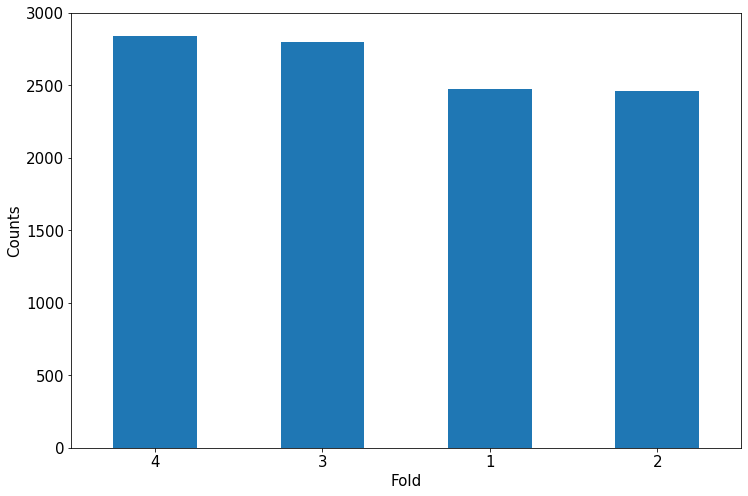

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = df['fold'].value_counts().plot(kind = 'bar',
     figsize = (12,8),fontsize=15,rot = 0)
ax.set_ylabel('Counts',fontsize = 15)
ax.set_xlabel('Fold',fontsize = 15)
ax.set_ylim(ymin = 0, ymax = 3000)
plt.show()

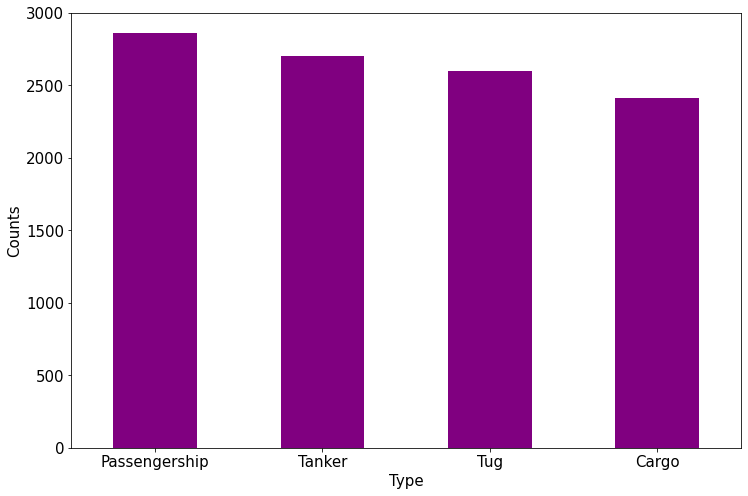

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = df['target'].value_counts().plot(kind = 'bar',color= 'purple',
     figsize = (12,8),fontsize=15,rot = 0)
ax.set_ylabel('Counts',fontsize = 15)
ax.set_xlabel('Type',fontsize = 15)
ax.set_ylim(ymin = 0, ymax = 3000)

species = ('Passengership', 'Tanker', 'Tug', 'Cargo')
ax.set_xticklabels(species)

plt.show()

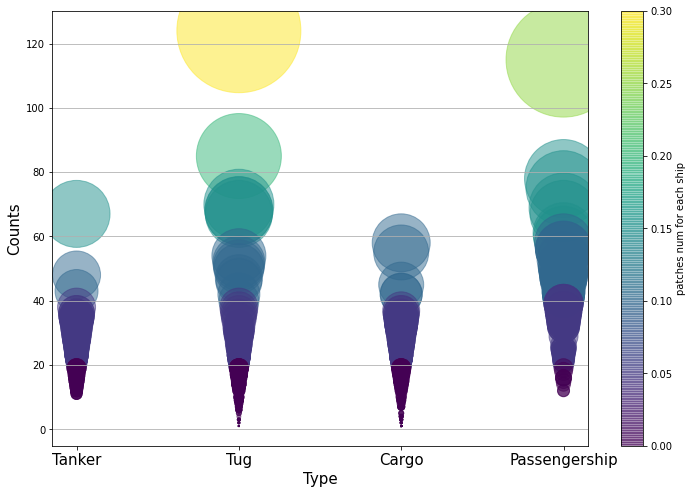

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
name = df['audio_name'].value_counts().index.tolist()
count = df['audio_name'].value_counts().tolist()
type_dict = df[['audio_name', 'target']].set_index('audio_name').to_dict(orient='dict')['target']
x = [type_dict[n] for n in name]
area = [(n ** 2) for n in count]
colors = [((n//20) * (1/20)) for n in count]

fig, ax = plt.subplots(figsize = (12,8))
plt.scatter(x, count, s=area, c=colors, alpha=0.5)
ax.yaxis.grid(True)
ax.set_xticks([0,1,2,3])
species = ('Tanker', 'Tug', 'Cargo','Passengership')
ax.set_xticklabels(species,fontsize=15)
ax.set_ylabel('Counts',fontsize = 15)
ax.set_xlabel('Type',fontsize = 15)
cbar = plt.colorbar(label='patches num for each ship')
#cbar.mappable.set_clim(vmin=np.min(count),vmax=np.max(count))